In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import sys



''' read the covid cases stastics from our world in data dataset https://ourworldindata.org/coronavirus '''
parse_dates = ['date']
features = pd.read_csv('owid-covid-data.csv',parse_dates=parse_dates)

In [13]:
''' Reading the data from CoronaWarn '''

parse_dates_de = ['start_date','end_date']
features_de = pd.read_csv('coronawarn-stats.csv',parse_dates=parse_dates_de)

,start_date,end_date,window,total_codes,entered_codes,total_pos,total_tested_cum,avg_r,max_r,total_downloads,pop,calls
0,2020-09-01,2020-09-21,21,4149,2350,30758,1000567,1.10,1.16,18.388,83.02,NaN
1,2020-09-22,2020-10-01,10,2742,1973,19979,1340606,1.20,1.25,18.795,83.02,NaN
2,2020-10-02,2020-10-06,5,2727,1649,11588,1588555,1.31,1.36,19.703,83.02,NaN
3,2020-10-07,2020-10-15,9,7266,4293,44980,1856301,1.44,1.48,19.471,83.02,NaN
4,2020-10-16,2020-10-21,6,8861,5188,45815,2092722,1.46,1.48,20.300,83.02,3266.0
5,2020-10-22,2020-11-04,13,46414,26218,210689,3000151,1.40,1.47,21.900,83.02,4213.0
6,2020-11-05,2020-11-11,7,28198,15010,129483,3525662,1.19,1.28,22.400,83.02,3577.0
7,2020-11-12,2020-11-18,7,26878,13950,129390,3959993,1.09,1.13,22.800,83.02,2885.0
8,2020-11-19,2020-11-25,7,25010,12683,128395,4415667,1.04,1.07,23.200,83.02,2484.0
9,2020-11-26,2020-12-02,7,22798,12026,122074,4820370,1.04,1.06,23.500,83.02,2358.0


/Users/ahmed/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/ahmed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


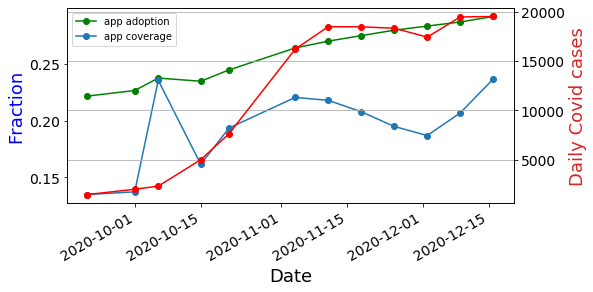

In [14]:
''' Figure S8'''
f, p1 = plt.subplots(figsize=(8, 4))

p1.set_xlabel("Date",fontsize=18)
p1.set_ylabel("Fraction", color="b",fontsize=18)
p1.tick_params(labelsize=14)

plt.plot(features_de['end_date'], features_de['total_downloads']/features_de['pop'],'-o',color="g",label='app adoption')    

plt.plot(features_de['end_date'], features_de['total_codes']/features_de['total_pos'],'-o',label='app coverage')
plt.legend(loc="top left")
ax2 = p1.twinx()
f.autofmt_xdate()
ax2.tick_params(labelsize=14)
color = 'tab:red'
ax2.set_ylabel('Daily Covid cases', color=color, fontsize=18)
plt.plot(features_de['end_date'], features_de['total_pos']/features_de['window'],'-o',color="r",label='Daily Covid cases')    
plt.grid(True)


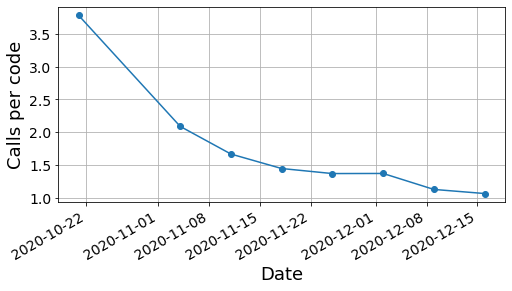

In [22]:
''' Figure S8'''
f, p1 = plt.subplots(figsize=(8, 4))

p1.set_xlabel("Date",fontsize=18)
p1.set_ylabel("Calls per code",fontsize=18)
p1.tick_params(labelsize=14)
plt.plot(features_de['end_date'], features_de['calls']*features_de['window']/features_de['entered_codes'],'-o',label='calls per code')
f.autofmt_xdate()

plt.grid(True)


In [ ]:
''' Read the SwissCovid data '''
ch_pop = 8545000
rslt_ch = features[(features['location'] == 'Switzerland') & (features['date']>'2020-07-21') ] 
parse_dates_ch = ['date']
features_ch = pd.read_csv('ts-q-14.01-SwissCovidApp-01.csv',parse_dates=parse_dates_ch)
features_ch_final = features_ch[(features_ch['date']>'2020-07-21') & (features_ch['date']<'2020-12-29')] 
features_ch_combined = pd.merge(rslt_ch, features_ch_final, on='date')

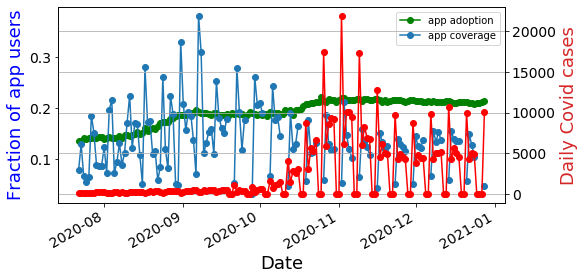

In [23]:
''' Figure S9'''
f, p1 = plt.subplots(figsize=(8, 4))
p1.set_xlabel("Date",fontsize=18)
p1.set_ylabel("Fraction of app users", color="b",fontsize=18)
p1.tick_params(labelsize=14)

plt.plot(features_ch_combined['date'], features_ch_combined['active_apps_total_new']/ch_pop,'-o',color="g",label='app adoption')    

plt.plot(features_ch_combined['date'], features_ch_combined['entered_codes_total']/features_ch_combined['new_cases'],'-o',label='app coverage') 

plt.legend()
ax2 = p1.twinx()
f.autofmt_xdate()
ax2.tick_params(labelsize=14)
color = 'tab:red'
ax2.set_ylabel('Daily Covid cases', color=color, fontsize=18)
plt.plot(features_ch_combined['date'], features_ch_combined['new_cases'],'-o',color="r",label='Daily Covid cases')    
plt.grid(True)



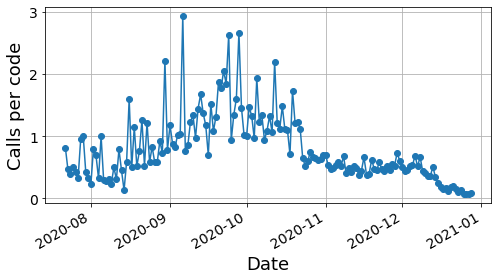

In [25]:
''' Figure S9'''
f, p1 = plt.subplots(figsize=(8, 4))
p1.set_xlabel("Date",fontsize=18)
p1.set_ylabel("Calls per code",fontsize=18)
p1.tick_params(labelsize=14)


plt.plot(features_ch_combined['date'], features_ch_combined['medical_hotline_count']/features_ch_combined['entered_codes_total'],'-o',label='Daily calls')    

f.autofmt_xdate()

plt.grid(True)

